0.9258873806933767


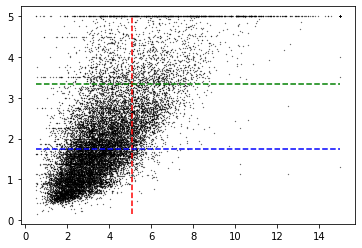

In [1]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import pdb 
from sklearn.tree import DecisionTreeRegressor
from io import StringIO  
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import pydotplus
from sklearn.datasets import fetch_california_housing

def plot_tree(dtree, feature_names):
    """ helper function """
    dot_data = StringIO()
    export_graphviz(dtree, out_file=dot_data,
                    filled=True, rounded=True,
                    special_characters=True, feature_names=feature_names)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    print('exporting tree to dtree.png')
    graph.write_png('dtree.png')


class RegressionStump():
    def __init__(self):
        """ The state variables of a stump"""
        self.idx = None
        self.val = None
        self.left = None
        self.right = None
        self.cost = None
    
    def fit(self, data, targets):
        """ Fit a decision stump to data
        
        Find the best way to split the data in feat minimizig the cost (0-1) loss of the tree after the split 
    
        Args:
           data: np.array (n, d)  features
           targets: np.array (n, ) targets
    
        sets self.idx, self.val, self.left, self.right
        """
        # update these three
        self.idx = 0
        self.val = None
        self.left = None
        self.right = None
        
        ### YOUR CODE HERE
        best_cost = np.inf
        for idx in range(data.shape[1]):    # Loop through all features
            sort_idx = np.argsort(data[:, idx])
            x_sorted = data[sort_idx, idx]
            y = targets[sort_idx]
            for split_idx in range(1, len(x_sorted)):     # Loop through all splits
                y_left = y[:split_idx]
                y_right = y[split_idx:]
                left = np.mean(y_left)
                right = np.mean(y_right)
                cost_left = np.sum((y_left - left) ** 2)
                cost_right = np.sum((y_right - right) ** 2)
                cost = cost_left + cost_right    # Total cost
                if cost < best_cost:    # If the cost is lower than the previous lowest we remember the values
                    best_cost = cost
                    self.idx = idx
                    self.val = (x_sorted[split_idx - 1] + x_sorted[split_idx]) / 2
                    self.left = left
                    self.right = right
        ### END CODE

    def predict(self, X):
        """ Regression tree prediction algorithm
        Args
            X: np.array, shape n,d
        
        returns pred: np.array shape n,  model prediction on X
        """
        pred = None
        ### YOUR CODE HERE
        left_filter = X[:, self.idx] < self.val
        right_filter = X[:, self.idx] >= self.val
        pred = np.zeros(X.shape[0])
        pred[left_filter] = self.left
        pred[right_filter] = self.right
        ### END CODE
        return pred
    
    def score(self, X, y):
        """ Compute accuracy of model
        Args
            X: np.array, shape n,d
            y: np.array, shape n, 
        returns out: scalar - means least scores cost
        """
        out = None
        ### YOUR CODE HERE
        estimate = self.predict(X)
        out = np.mean((estimate - y)**2)
        ### END CODE
        return out
    
housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.2)
stump = RegressionStump()
stump.fit(X_train, y_train)
print(stump.score(X_test, y_test))

plt.figure()
plt.plot(X_train[:, stump.idx], y_train, 'k.', markersize=0.5)
plt.plot(stump.val * np.ones(2), [np.min(y_train), np.max(y_train)], 'r--')
plt.plot([np.min(X_train[:, stump.idx]), np.max(X_train[:, stump.idx])], stump.left * np.ones(2), 'b--')
plt.plot([np.min(X_train[:, stump.idx]), np.max(X_train[:, stump.idx])], stump.right * np.ones(2), 'g--')
plt.show()


In [ ]:
for idx in range(data.shape[1]): # O(d)
    sort_idx = np.argsort(data[:, idx]) # quick-sort: O(n^2)
    x_sorted = data[sort_idx, idx] # O(n)
    y = targets[sort_idx] # O(n)
    x_splits = (x_sorted[:-1] + x_sorted[1:]) / 2 # O(n)
    for split_idx, value in zip(range(1, len(x_splits) + 1), x_splits): # O(n)
        # Everything in here is O(n)
        y_left = y[:split_idx]
        y_right = y[split_idx:]
        left = np.mean(y_left)
        right = np.mean(y_right)
        cost_left = np.sum((y_left - left) ** 2)
        cost_right = np.sum((y_right - right) ** 2)
        cost = cost_left + cost_right
        if cost < self.cost:
            self.cost = cost
            self.idx = idx
            self.val = value
            self.left = left
            self.right = right

# The running time is O(dn^2)

In [65]:

def main():
    """ Simple method testing """
    housing = fetch_california_housing()
    # split 80/20 train-test
    X_train, X_test, y_train, y_test = train_test_split(housing.data,
                                                        housing.target,
                                                        test_size=0.2)

    baseline_accuracy = np.mean((y_test-np.mean(y_train))**2)
    print('Least Squares Cost of learning mean of training data:', baseline_accuracy) 
    print('Lets see if we can do better with just one question')
    D = RegressionStump()
    D.fit(X_train, y_train)
    print('idx, val, left, right', D.idx, D.val, D.left, D.right)
    print('Feature name of idx', housing.feature_names[D.idx])
    print('Score of model', D.score(X_test, y_test))
    print('lets compare with sklearn decision tree')
    dc = DecisionTreeRegressor(max_depth=1)
    dc.fit(X_train, y_train)
    dc_score = ((dc.predict(X_test)-y_test)**2).mean()
    print('dc score', dc_score)
    print('feature names - for comparison', list(enumerate(housing.feature_names)))
    plot_tree(dc, housing.feature_names)

if __name__ == '__main__':
    main()

Least Squares Cost of learning mean of training data: 1.334805917986529
Lets see if we can do better with just one question
idx, val, left, right 0 5.032 1.7297435707144504 3.307722140210886
Feature name of idx MedInc
Score of model 0.9384693771400963
lets compare with sklearn decision tree
dc score 0.9384693771400957
feature names - for comparison [(0, 'MedInc'), (1, 'HouseAge'), (2, 'AveRooms'), (3, 'AveBedrms'), (4, 'Population'), (5, 'AveOccup'), (6, 'Latitude'), (7, 'Longitude')]
exporting tree to dtree.png


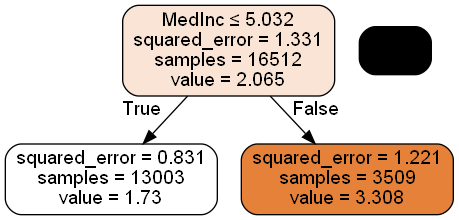